### A basic example in which we track a metric (eg phase coherence) and stop the simulation if the metric reaches a threshold value

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_activity, plot_phase_coherence

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

In [2]:
# Instantiate a random graph and transform into an adjacency matrix
graph_nx = nx.erdos_renyi_graph(n=50, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

### Run simulation: Run little time windows and check if the stopping criterion is met

In [4]:
def simulate_with_threshold(
    model,
    max_T = 10,  # define a max time to simulate
    check_every_t = 1,
    stop_threshold = .6,
):
    model.T = check_every_t
    angles_vec = model.init_angles()  # initialize state vector
    total_T = 0
    act_mat = []  # accumulate activity matrix
    while True:
        current_act_mat = model.run(adj_mat=graph, angles_vec=angles_vec)
        act_mat.append(current_act_mat)
        total_T += model.dt * model.T * len(act_mat)
        last_angles_vec = current_act_mat[:, -1]

        # Check if we either reached the threshold or ran out of time
        criterion = model.phase_coherence(last_angles_vec)
        if criterion >= stop_threshold:
            print(f"stop_threshold reached: {criterion} > {stop_threshold}. Stopping simulation")
            break    

        if total_T >= max_T:
            print("stop_threshold not reached, but ran out of time")
            break

        angles_vec = last_angles_vec  # Carry angles_vec to next simulation time window

    act_mat = np.concatenate(act_mat, axis=1)
    return act_mat

stop_threshold reached: 0.6954944180757041 > 0.6. Stopping simulation


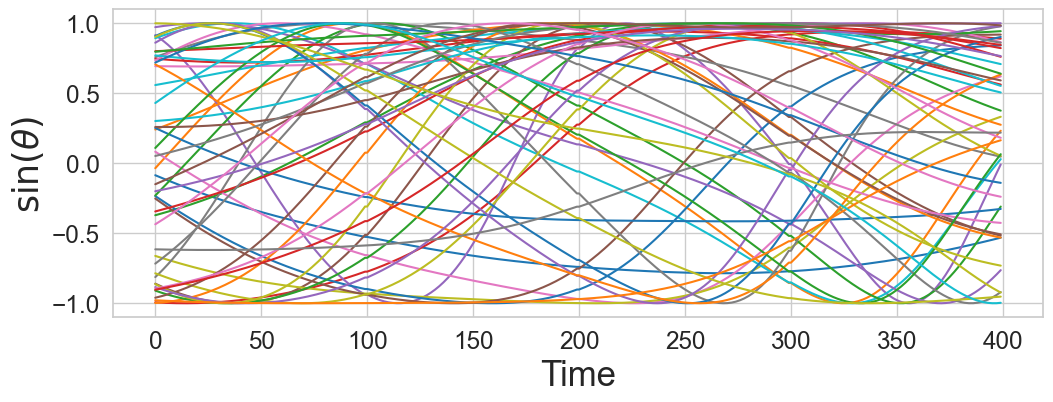

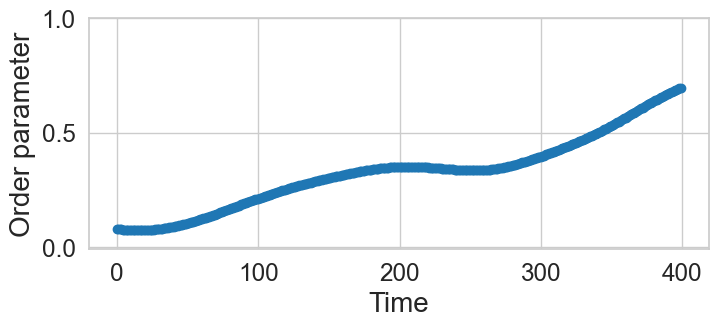

In [5]:
model = Kuramoto(coupling=2, dt=0.01, n_nodes=len(graph))
act_mat = simulate_with_threshold(model)                   

plot_activity(act_mat)
plot_phase_coherence(act_mat);

Let's make the threshold so high that we run out of time

stop_threshold not reached, but ran out of time


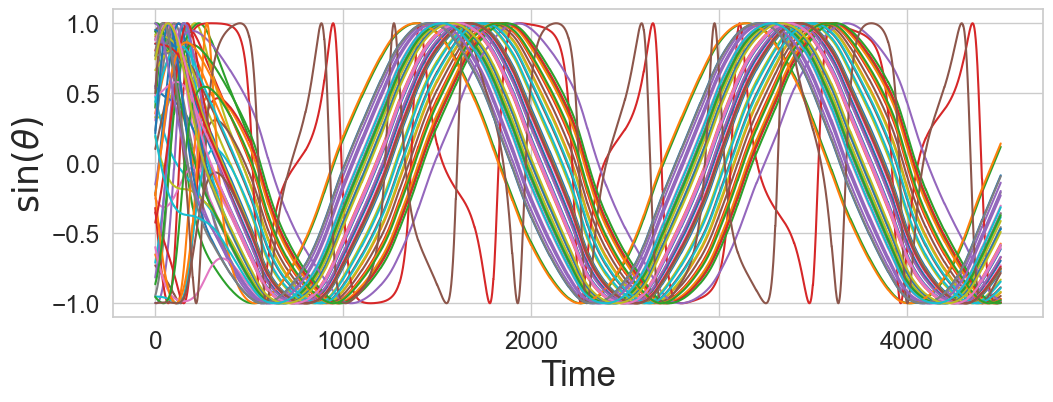

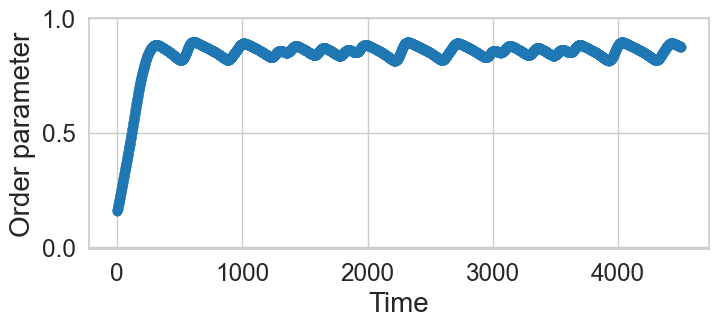

In [6]:
model = Kuramoto(coupling=2, dt=0.01, n_nodes=len(graph))
act_mat = simulate_with_threshold(model, stop_threshold=1.2)                   

plot_activity(act_mat)
plot_phase_coherence(act_mat);